In [16]:
# REFERENCE - (DONT USE IT) https://analyticsindiamag.com/gaussian-mixture-model-clustering-vs-k-means-which-one-to-choose/

In [17]:
# 19BDS0042 SAMARTH GUPTA

In [18]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
# SHOW PLOTS INLINE
%matplotlib inline

In [19]:
# READING DATASET
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,5.5,2.6,4.4,1.2,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
76,6.8,2.8,4.8,1.4,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica


In [20]:
# STORING VARIABLES
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [21]:
# FEATURE SCALING
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,1.401508,0.337848,0.535296,0.264699
72,0.553333,-1.281972,0.649027,0.396172
13,-1.870024,-0.124958,-1.511870,-1.444450
125,1.643844,0.337848,1.274550,0.790591
91,0.310998,-0.124958,0.478430,0.264699


In [22]:
# APPLYING K-MEANS CLUSTERING ALGORITHM
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

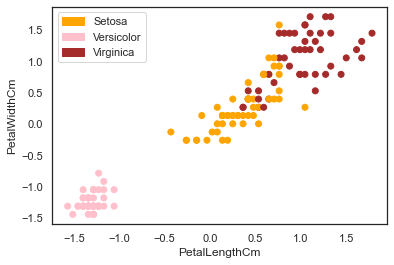

In [23]:
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Setosa')
pink_patch = mpatches.Patch(color='pink', label='Versicolor')
brown_patch = mpatches.Patch(color='brown', label='Virginica')
colors = np.array(['orange', 'pink', 'brown'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_kmeans])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[orange_patch, pink_patch, brown_patch])
plt.show()

In [24]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

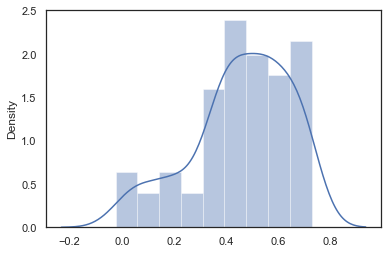

In [25]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans) 
score

0.6201351808870379

In [27]:
# GMM CLUSTERING ALGORITHM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

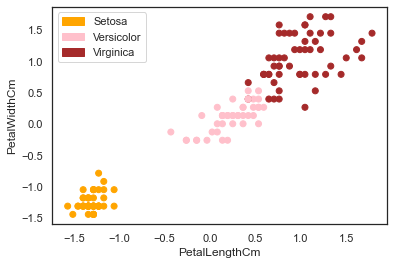

In [28]:
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Setosa')
pink_patch = mpatches.Patch(color='pink', label='Versicolor')
brown_patch = mpatches.Patch(color='brown', label='Virginica')
colors = np.array(['orange', 'pink', 'brown'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_gmm])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[orange_patch, pink_patch, brown_patch])
plt.show()

In [29]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_gmm)
score

0.3727731874570307

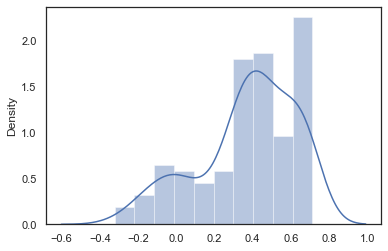

In [30]:
score = metrics.silhouette_samples(X_scaled, y_cluster_gmm)
sns.distplot(score);

In [31]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124

In [38]:
# RESULT :-

# The Gaussian mixture model has an adjusted rand score of 0.9. It gives a better fit of clustering.
# The gaussian model plot displays very little overlap between the data points of different clusters. 

# CONCLUSION - Gaussian model gives us a better result than K-Means.

In [39]:
# 19BDS0042 SAMARTH GUPTA